In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import yfinance as yfs 

In [11]:
symbol = 'META'

orginal = yfs.download(symbol, period="max", interval="1d")
orginal.to_csv("META.csv")

[*********************100%***********************]  1 of 1 completed


In [12]:
orginal = pd.read_csv("META.csv")
orginal = orginal[2:]
orginal = orginal.reset_index()
orginal = orginal.drop(columns=["index"])
orginal = orginal.rename(columns={"Price":"Date"})
columns_to_convert = ["Close", "High", "Low", "Open"]
orginal[columns_to_convert] = orginal[columns_to_convert].astype(float)
orginal['Date'] = pd.to_datetime(orginal['Date'])
orginal['Volume'] = orginal['Volume'].astype(int)
orginal.head()

,Date,Close,High,Low,Open,Volume
0,2012-05-18,38.050663,44.788905,37.821742,41.852743,573576400
1,2012-05-21,33.870369,36.488033,32.845202,36.358642,168192700
2,2012-05-22,30.854584,33.432435,30.794866,32.457032,101786600
3,2012-05-23,31.849892,32.347546,31.212894,31.222848,73600000
4,2012-05-24,32.875057,33.054213,31.620969,32.795434,50237200


In [13]:
orginal.head(), orginal.tail()

(        Date      Close       High        Low       Open     Volume
 0 2012-05-18  38.050663  44.788905  37.821742  41.852743  573576400
 1 2012-05-21  33.870369  36.488033  32.845202  36.358642  168192700
 2 2012-05-22  30.854584  33.432435  30.794866  32.457032  101786600
 3 2012-05-23  31.849892  32.347546  31.212894  31.222848   73600000
 4 2012-05-24  32.875057  33.054213  31.620969  32.795434   50237200,
            Date       Close        High         Low        Open    Volume
 3236 2025-04-02  583.929993  592.659973  573.359985  574.909973  13470800
 3237 2025-04-03  531.619995  552.559998  530.299988  546.219971  34777500
 3238 2025-04-04  504.730011  518.000000  494.200012  506.619995  38589800
 3239 2025-04-07  516.250000  539.369995  481.899994  485.100006  36606100
 3240 2025-04-08  510.450012  547.429993  502.859985  543.250000  27921600)

In [27]:
df = orginal[(orginal['Date']>=datetime.datetime(2024,1,1))& (orginal['Date']<=datetime.datetime(2024,12,31))].reset_index().drop(columns=["index"])
test = orginal[orginal['Date']>datetime.datetime(2024,12,31)].reset_index().drop(columns=["index"])
df.tail(), test.head()

(          Date       Close        High         Low        Open   Volume
 247 2024-12-24  607.209778  607.449555  598.747336  602.184220  4726100
 248 2024-12-26  602.813660  605.761050  598.407607  604.941771  6081400
 249 2024-12-27  599.276855  601.315020  589.275743  598.877187  8084200
 250 2024-12-30  590.714417  596.409362  585.059475  588.226640  7025900
 251 2024-12-31  584.989563  593.442004  583.331004  591.743564  6019500,
         Date       Close        High         Low        Open    Volume
 0 2025-01-02  598.707336  604.372279  587.297505  589.195779  12682300
 1 2025-01-03  604.092529  608.958195  595.879805  604.222419  11436800
 2 2025-01-06  629.639832  630.429107  605.081663  611.286165  14560800
 3 2025-01-07  617.340759  631.538089  607.689312  631.138481  12071500
 4 2025-01-08  610.177124  615.892071  602.254180  612.854796  10085800)

# 5. Stock Signals

In [18]:
#Simple moving average

df["SMA30"] = df["Close"].rolling(window=10).mean()
df["SMA90"] = df["Close"].rolling(window=50).mean()
# Identify Buy and Sell signals
df["Buy_Signal_SMA"] = (df["SMA30"] > df["SMA90"]) & (df["SMA30"].shift(1) <= df["SMA90"].shift(1))
df["Sell_Signal_SMA"] = (df["SMA30"] < df["SMA90"]) & (df["SMA30"].shift(1) >= df["SMA90"].shift(1))

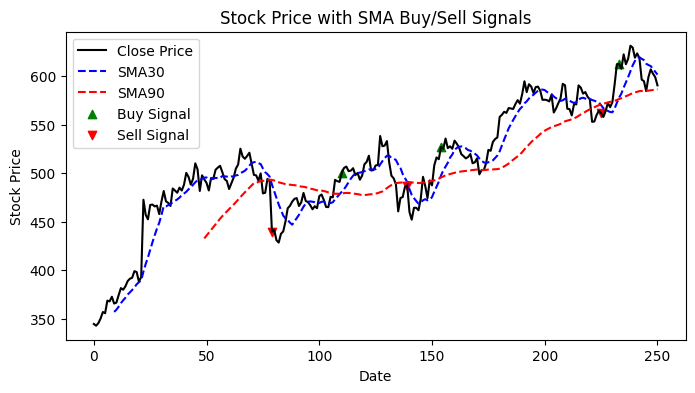

In [19]:
#Plot
plt.figure(figsize=(8, 4))
plt.plot(df["Close"], label="Close Price", color="black")
plt.plot(df["SMA30"], label="SMA30", color="blue", linestyle="dashed")
plt.plot(df["SMA90"], label="SMA90", color="red", linestyle="dashed")
# Plot Buy and Sell Signals
plt.scatter(df.index[df["Buy_Signal_SMA"]], df["Close"][df["Buy_Signal_SMA"]], marker="^", color="green", label="Buy Signal", alpha=1)
plt.scatter(df.index[df["Sell_Signal_SMA"]], df["Close"][df["Sell_Signal_SMA"]], marker="v", color="red", label="Sell Signal", alpha=1)
plt.title("Stock Price with SMA Buy/Sell Signals")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

In [20]:
#Exponential moving average

df["EMA30"] = df["Close"].ewm(span= 10, adjust=False, min_periods=30).mean()
df["EMA90"] = df["Close"].ewm(span=50, adjust=False, min_periods=90).mean()
df["Buy_Signal_EMA"] = (df["EMA30"] > df["EMA90"]) & (df["EMA30"].shift(1) <= df["EMA90"].shift(1))
df["Sell_Signal_EMA"] = (df["EMA30"] < df["EMA90"]) & (df["EMA30"].shift(1) >= df["EMA90"].shift(1))

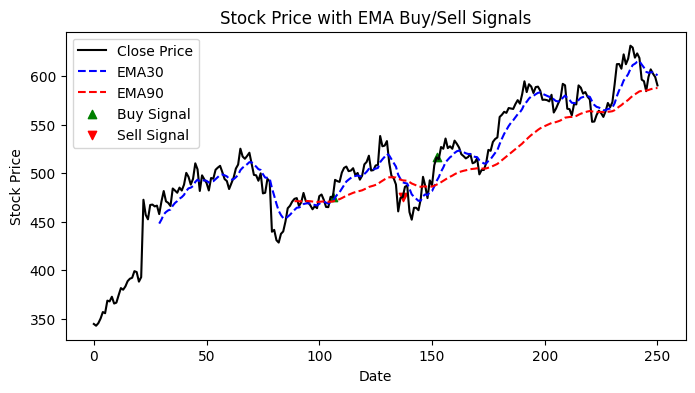

In [21]:

#Plot
plt.figure(figsize=(8, 4))
plt.plot(df["Close"], label="Close Price", color="black")
plt.plot(df["EMA30"], label="EMA30", color="blue", linestyle="dashed")
plt.plot(df["EMA90"], label="EMA90", color="red", linestyle="dashed")
# Plot Buy and Sell Signals
plt.scatter(df.index[df["Buy_Signal_EMA"]], df["Close"][df["Buy_Signal_EMA"]], marker="^", color="green", label="Buy Signal", alpha=1)
plt.scatter(df.index[df["Sell_Signal_EMA"]], df["Close"][df["Sell_Signal_EMA"]], marker="v", color="red", label="Sell Signal", alpha=1)
plt.title("Stock Price with EMA Buy/Sell Signals")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()
plt.show()


# 6. Forecasting

In [ ]:
!pip install prophet --quiet

In [22]:
import pandas as pd
from prophet import Prophet

In [28]:
dfp = df[["Date","Close"]]
dfp.columns = ["ds",  "y"]
dfp.head()

,ds,y
0,2024-01-02,344.665588
1,2024-01-03,342.854126
2,2024-01-04,345.491669
3,2024-01-05,350.299072
4,2024-01-08,356.977600


In [29]:
dfp.tail()

,ds,y
247,2024-12-24,607.209778
248,2024-12-26,602.813660
249,2024-12-27,599.276855
250,2024-12-30,590.714417
251,2024-12-31,584.989563


In [58]:
m = Prophet()
m.add_country_holidays(country_name='US')
m.add_seasonality(name='yearly', period=365.25, fourier_order=5)
# m.add_seasonality(name='monthly', period=30.5, fourier_order=5)
m.fit(dfp)
future = m.make_future_dataframe(periods=len(test))
forecast = m.predict(future)

INFO:prophet:Found custom seasonality named 'yearly', disabling built-in 'yearly' seasonality.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsk5lhfl2/fgdfrdj1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsk5lhfl2/w1apueii.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44537', 'data', 'file=/tmp/tmpsk5lhfl2/fgdfrdj1.json', 'init=/tmp/tmpsk5lhfl2/w1apueii.json', 'output', 'file=/tmp/tmpsk5lhfl2/prophet_modelsyi6xxwy/prophet_model-20250409052346.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:23:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:23:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


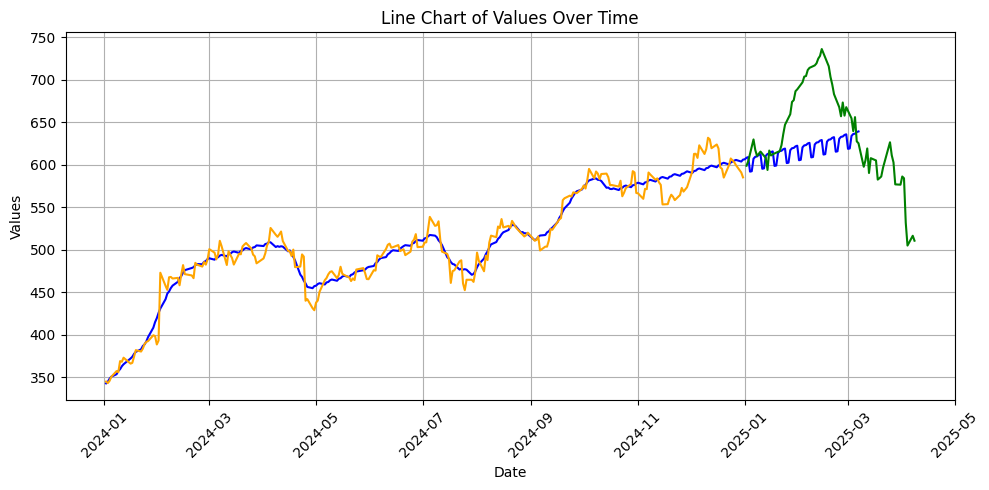

In [61]:
# forecast

plt.figure(figsize=(10, 5))
plt.plot(forecast['ds'], forecast['yhat'], linestyle='-', color='blue')
plt.plot(df['Date'], df['Close'], color='orange')
plt.plot(test['Date'], test['Close'], color='green')

plt.title('Line Chart of Values Over Time')
plt.xlabel('Date')
plt.ylabel('Values')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### suitable codes
changepoint_prior_scale  = 0.5 is more suitable

m2 = Prophet()
m2.add_seasonality(name='quarterly', period=365.25/4, fourier_order=3)
m2.fit(dfp)
future2 = m2.make_future_dataframe(periods=len(test))
forecast2 = m2.predict(future2)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsk5lhfl2/3i7xr9tb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsk5lhfl2/q_4tvmj9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66431', 'data', 'file=/tmp/tmpsk5lhfl2/3i7xr9tb.json', 'init=/tmp/tmpsk5lhfl2/q_4tvmj9.json', 'output', 'file=/tmp/tmpsk5lhfl2/prophet_modely3sykxk9/prophet_model-20250409053327.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:33:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:33:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


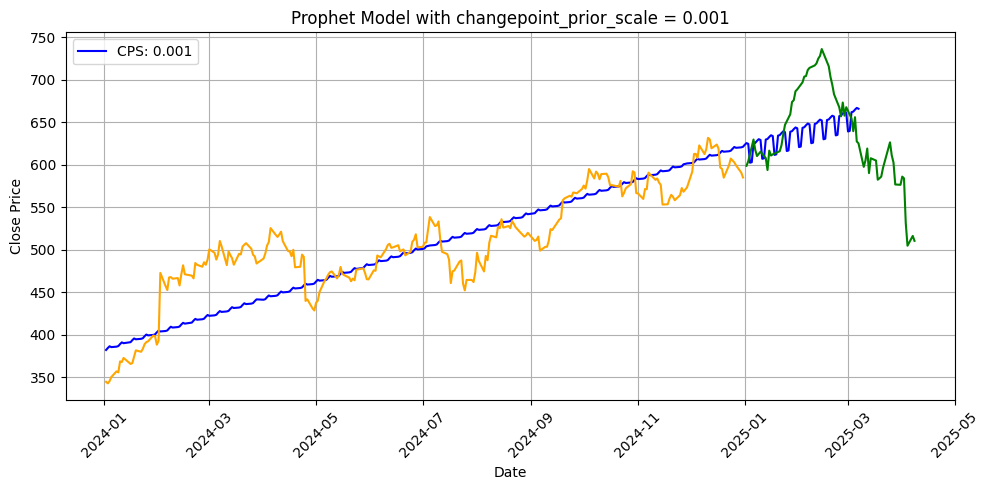

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsk5lhfl2/bexcj8ny.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsk5lhfl2/vaqu2xea.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31747', 'data', 'file=/tmp/tmpsk5lhfl2/bexcj8ny.json', 'init=/tmp/tmpsk5lhfl2/vaqu2xea.json', 'output', 'file=/tmp/tmpsk5lhfl2/prophet_modelc82es1au/prophet_model-20250409053327.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:33:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:33:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


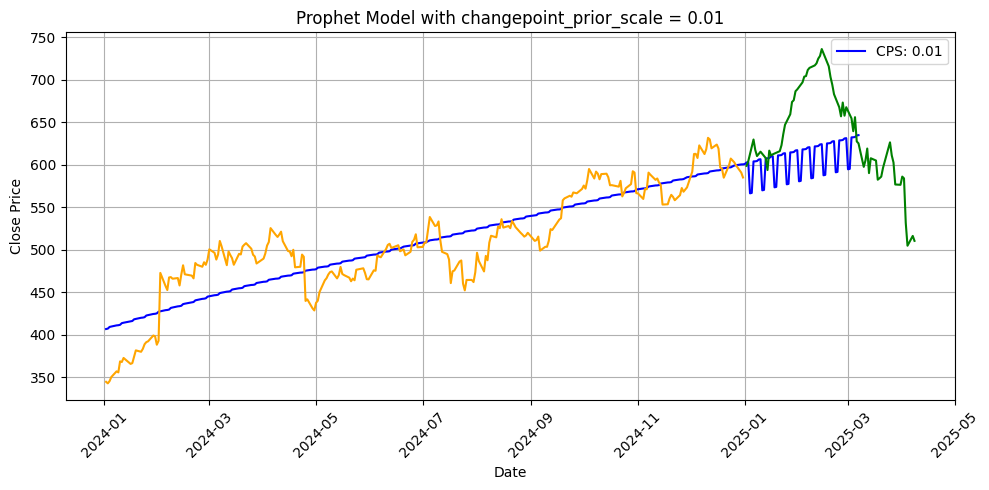

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsk5lhfl2/ce2oeu67.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsk5lhfl2/bd5o8nu7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87711', 'data', 'file=/tmp/tmpsk5lhfl2/ce2oeu67.json', 'init=/tmp/tmpsk5lhfl2/bd5o8nu7.json', 'output', 'file=/tmp/tmpsk5lhfl2/prophet_modelx3h7wehb/prophet_model-20250409053328.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:33:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:33:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


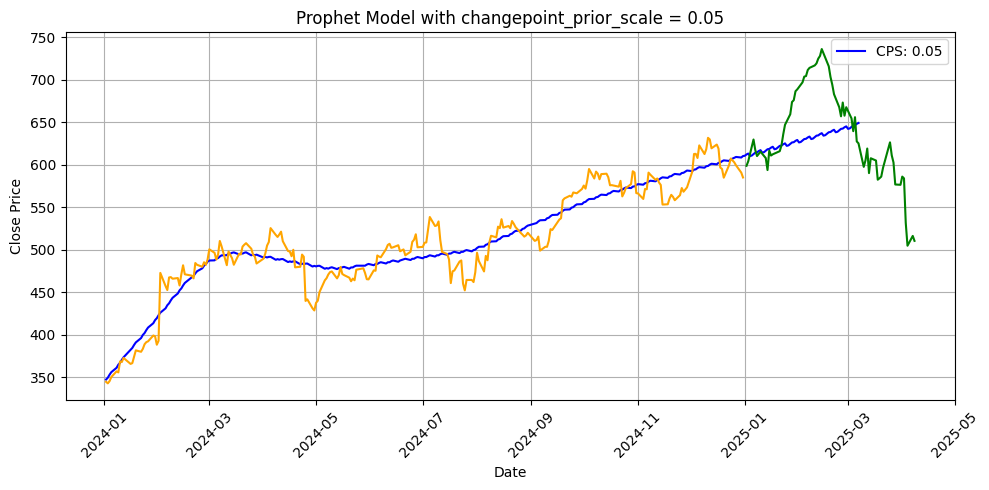

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsk5lhfl2/h4oyie_r.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsk5lhfl2/e37k5my5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26618', 'data', 'file=/tmp/tmpsk5lhfl2/h4oyie_r.json', 'init=/tmp/tmpsk5lhfl2/e37k5my5.json', 'output', 'file=/tmp/tmpsk5lhfl2/prophet_model8ft21695/prophet_model-20250409053328.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:33:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:33:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


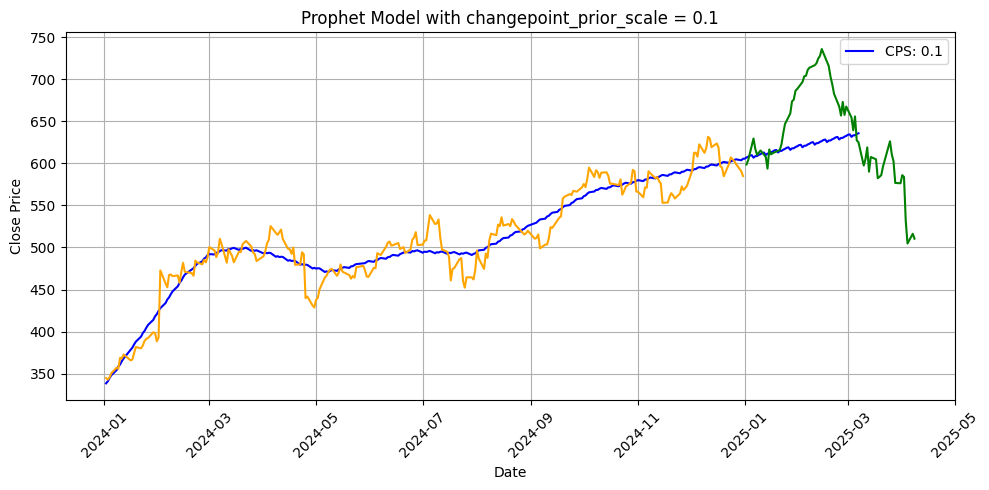

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsk5lhfl2/ran4rwcc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsk5lhfl2/tyhby4cf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28062', 'data', 'file=/tmp/tmpsk5lhfl2/ran4rwcc.json', 'init=/tmp/tmpsk5lhfl2/tyhby4cf.json', 'output', 'file=/tmp/tmpsk5lhfl2/prophet_modelse99o6bm/prophet_model-20250409053329.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:33:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:33:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


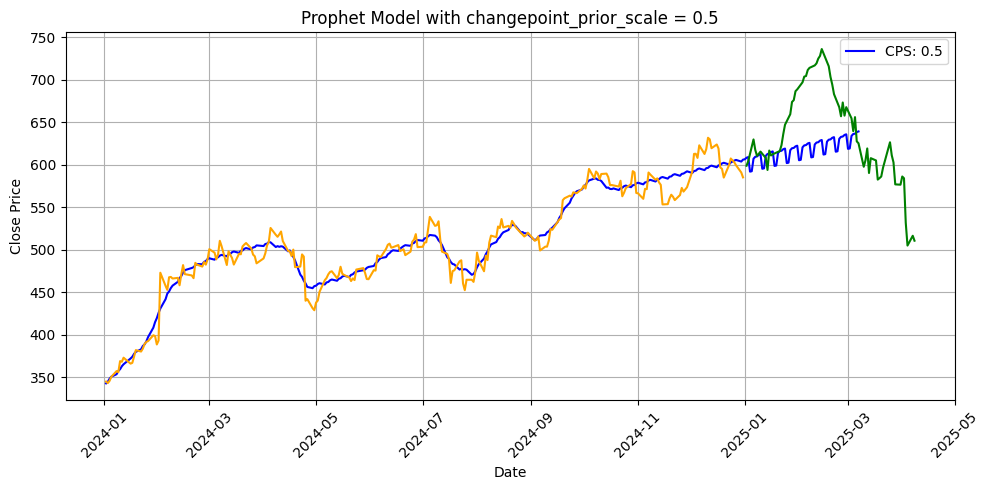

In [62]:
for cps in [0.001, 0.01, 0.05, 0.1, 0.5]:
    m = Prophet(changepoint_prior_scale=cps)
    m.fit(dfp)
    future = m.make_future_dataframe(periods=len(test))
    forecast = m.predict(future)

    plt.figure(figsize=(10, 5))
    plt.plot(forecast['ds'], forecast['yhat'], linestyle='-', color='blue', label=f'CPS: {cps}')
    plt.plot(df['Date'], df['Close'], color='orange')
    plt.plot(test['Date'], test['Close'], color='green')
    plt.title(f'Prophet Model with changepoint_prior_scale = {cps}')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.grid(True)
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsk5lhfl2/0i6jeb64.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsk5lhfl2/5gwx220p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58070', 'data', 'file=/tmp/tmpsk5lhfl2/0i6jeb64.json', 'init=/tmp/tmpsk5lhfl2/5gwx220p.json', 'output', 'file=/tmp/tmpsk5lhfl2/prophet_modelo5c5h8ff/prophet_model-20250409053615.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:36:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:36:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


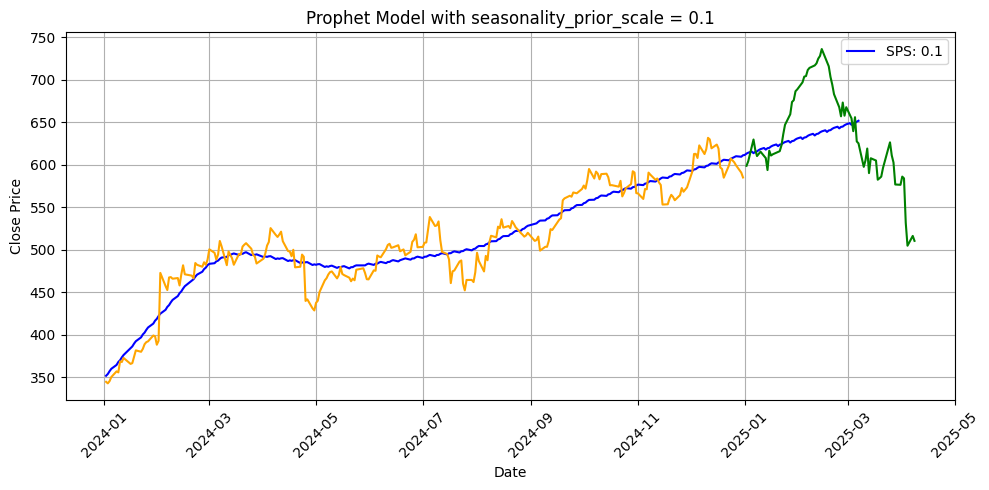

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsk5lhfl2/xco4jhn4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsk5lhfl2/kbrljucb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26937', 'data', 'file=/tmp/tmpsk5lhfl2/xco4jhn4.json', 'init=/tmp/tmpsk5lhfl2/kbrljucb.json', 'output', 'file=/tmp/tmpsk5lhfl2/prophet_model9zj6u4mx/prophet_model-20250409053615.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:36:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:36:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


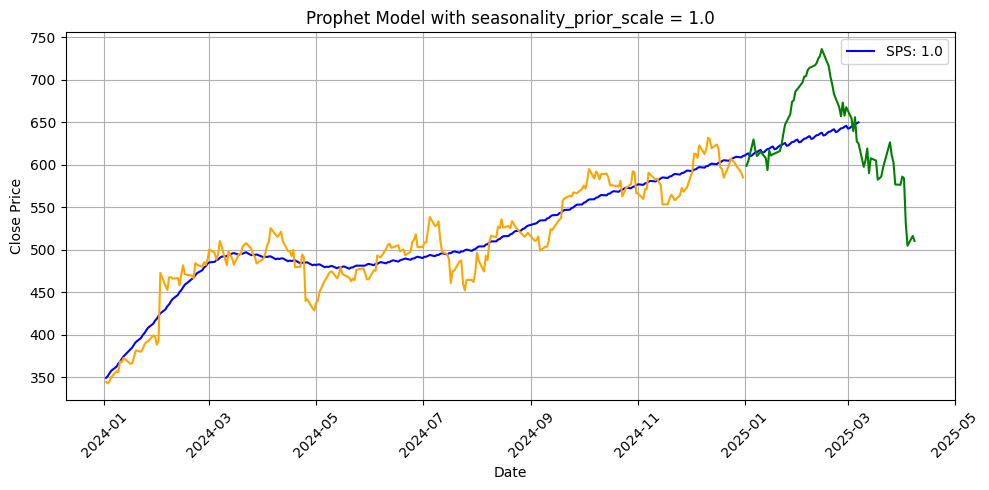

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsk5lhfl2/e344jwe0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsk5lhfl2/kjwgm7vy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40464', 'data', 'file=/tmp/tmpsk5lhfl2/e344jwe0.json', 'init=/tmp/tmpsk5lhfl2/kjwgm7vy.json', 'output', 'file=/tmp/tmpsk5lhfl2/prophet_modeld8ys9cik/prophet_model-20250409053616.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:36:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:36:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


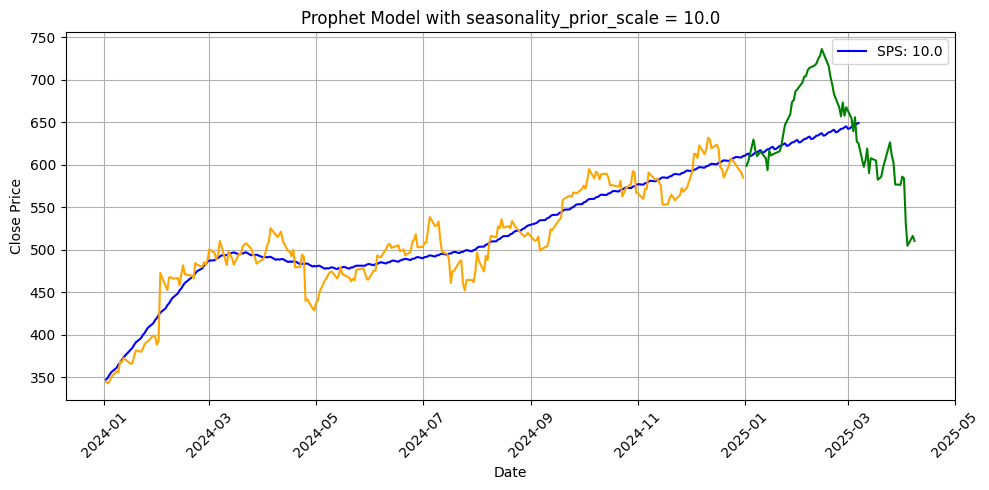

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsk5lhfl2/tn7ma8gy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsk5lhfl2/p5dh81qa.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83733', 'data', 'file=/tmp/tmpsk5lhfl2/tn7ma8gy.json', 'init=/tmp/tmpsk5lhfl2/p5dh81qa.json', 'output', 'file=/tmp/tmpsk5lhfl2/prophet_modelck2uvujj/prophet_model-20250409053616.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:36:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:36:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


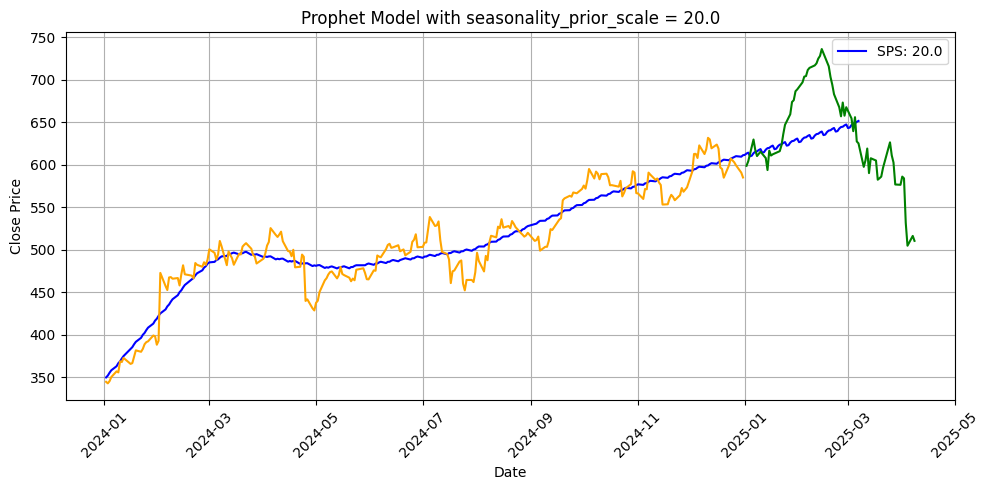

In [63]:
for sps in [0.1, 1.0, 10.0, 20.0]:
    m = Prophet(seasonality_prior_scale=sps)
    m.fit(dfp)
    future = m.make_future_dataframe(periods=len(test))
    forecast = m.predict(future)

    plt.figure(figsize=(10, 5))
    plt.plot(forecast['ds'], forecast['yhat'], linestyle='-', color='blue', label=f'SPS: {sps}')
    plt.plot(df['Date'], df['Close'], color='orange')
    plt.plot(test['Date'], test['Close'], color='green')
    plt.title(f'Prophet Model with seasonality_prior_scale = {sps}')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.grid(True)
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [64]:
m = Prophet()
m.add_seasonality(name='monthly', period=30.5, fourier_order=5)
m.fit(dfp)
future = m.make_future_dataframe(periods=len(test))
forecast = m.predict(future)
# Plot the results

m2 = Prophet()
m2.add_seasonality(name='quarterly', period=365.25/4, fourier_order=3)
m2.fit(dfp)
future2 = m2.make_future_dataframe(periods=len(test))
forecast2 = m2.predict(future2)
# Plot the results

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsk5lhfl2/r7et7zzy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsk5lhfl2/50ofhihx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37440', 'data', 'file=/tmp/tmpsk5lhfl2/r7et7zzy.json', 'init=/tmp/tmpsk5lhfl2/50ofhihx.json', 'output', 'file=/tmp/tmpsk5lhfl2/prophet_modelk83v851o/prophet_model-20250409054302.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:43:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:43:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonalit

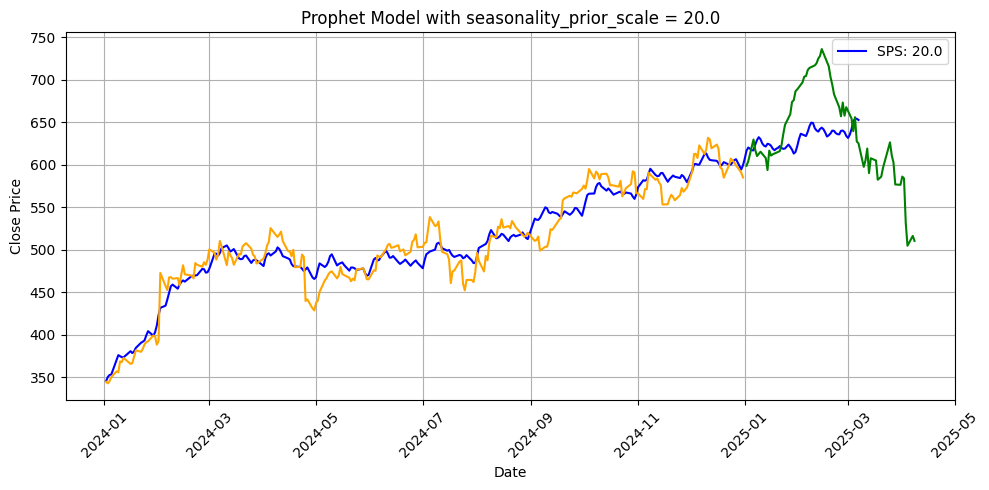

In [65]:
plt.figure(figsize=(10, 5))
plt.plot(forecast['ds'], forecast['yhat'], linestyle='-', color='blue', label=f'SPS: {sps}')
plt.plot(df['Date'], df['Close'], color='orange')
plt.plot(test['Date'], test['Close'], color='green')
plt.title(f'Prophet Model with seasonality_prior_scale = {sps}')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

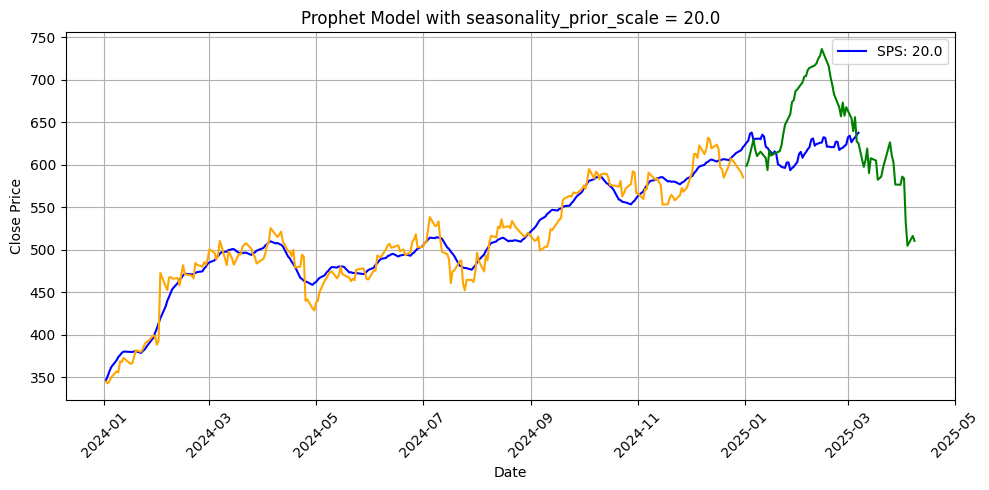

In [66]:
plt.figure(figsize=(10, 5))
plt.plot(forecast2['ds'], forecast2['yhat'], linestyle='-', color='blue', label=f'SPS: {sps}')
plt.plot(df['Date'], df['Close'], color='orange')
plt.plot(test['Date'], test['Close'], color='green')
plt.title(f'Prophet Model with seasonality_prior_scale = {sps}')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [67]:
from prophet import Prophet
import pandas as pd

canadian_holidays = Prophet()
canadian_holidays.add_country_holidays(country_name='CA')
holidays_df = canadian_holidays.train_holiday_names

m = Prophet(holidays=holidays_df)
m.fit(dfp)
future = m.make_future_dataframe(periods=len(test))
forecast = m.predict(future)
# Plot the results

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsk5lhfl2/bigf29yc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsk5lhfl2/dg84f6op.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33204', 'data', 'file=/tmp/tmpsk5lhfl2/bigf29yc.json', 'init=/tmp/tmpsk5lhfl2/dg84f6op.json', 'output', 'file=/tmp/tmpsk5lhfl2/prophet_model3c3egte1/prophet_model-20250409063240.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:32:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:32:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


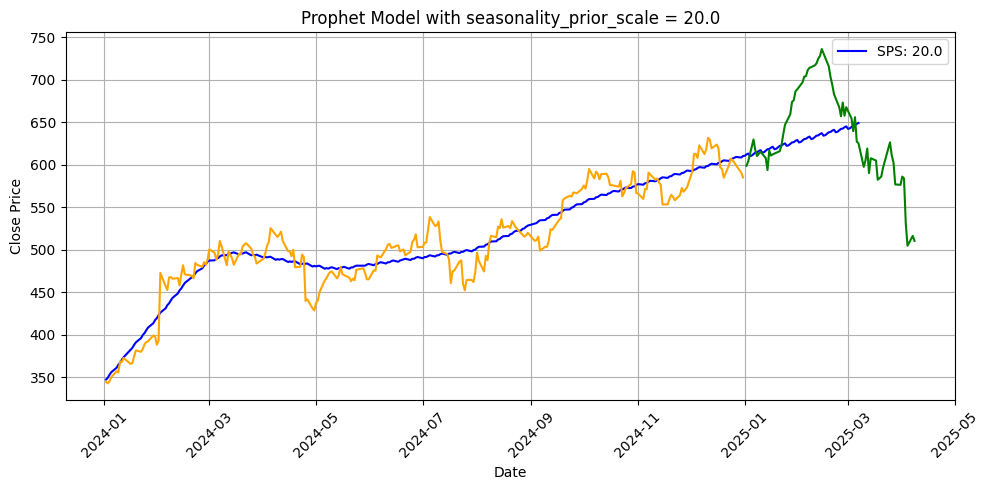

In [69]:
plt.figure(figsize=(10, 5))
plt.plot(forecast['ds'], forecast['yhat'], linestyle='-', color='blue', label=f'SPS: {sps}')
plt.plot(df['Date'], df['Close'], color='orange')
plt.plot(test['Date'], test['Close'], color='green')
plt.title(f'Prophet Model with seasonality_prior_scale = {sps}')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [71]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

def evaluate_forecast(forecast, actual):
    y_true = actual['Close'].values
    y_pred = forecast['yhat'][-len(actual):].values
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f'MAE: {mae:.2f}')
    print(f'RMSE: {rmse:.2f}')

# After each model training and prediction
evaluate_forecast(forecast, test)

MAE: 47.70
RMSE: 60.05


In [74]:
from prophet.diagnostics import cross_validation, performance_metrics

df_cv = cross_validation(m, initial='10 days', period='90 days', horizon='180 days')
df_p = performance_metrics(df_cv)
print(df_p.head())

INFO:prophet:Making 2 forecasts with cutoffs between 2024-04-05 00:00:00 and 2024-07-04 00:00:00


  0%|          | 0/2 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpsk5lhfl2/o8i5jgrl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsk5lhfl2/6zoisp8b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4523', 'data', 'file=/tmp/tmpsk5lhfl2/o8i5jgrl.json', 'init=/tmp/tmpsk5lhfl2/6zoisp8b.json', 'output', 'file=/tmp/tmpsk5lhfl2/prophet_model61qhap9y/prophet_model-20250409063556.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
06:35:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:35:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsk5lhfl2/qtaakyn3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsk5lhfl2/zpti9yvw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  horizon          mse       rmse        mae      mape     mdape     smape  \
0 18 days   772.812759  27.799510  23.131083  0.047146  0.032054  0.045807   
1 19 days   828.985857  28.792114  24.214451  0.049602  0.035158  0.048039   
2 20 days  1265.374649  35.572105  29.286967  0.061219  0.045923  0.058599   
3 21 days  1791.358391  42.324442  34.923341  0.074187  0.058172  0.070300   
4 22 days  1983.393909  44.535311  37.238223  0.079319  0.066922  0.074987   

   coverage  
0  0.500000  
1  0.458333  
2  0.375000  
3  0.291667  
4  0.250000  


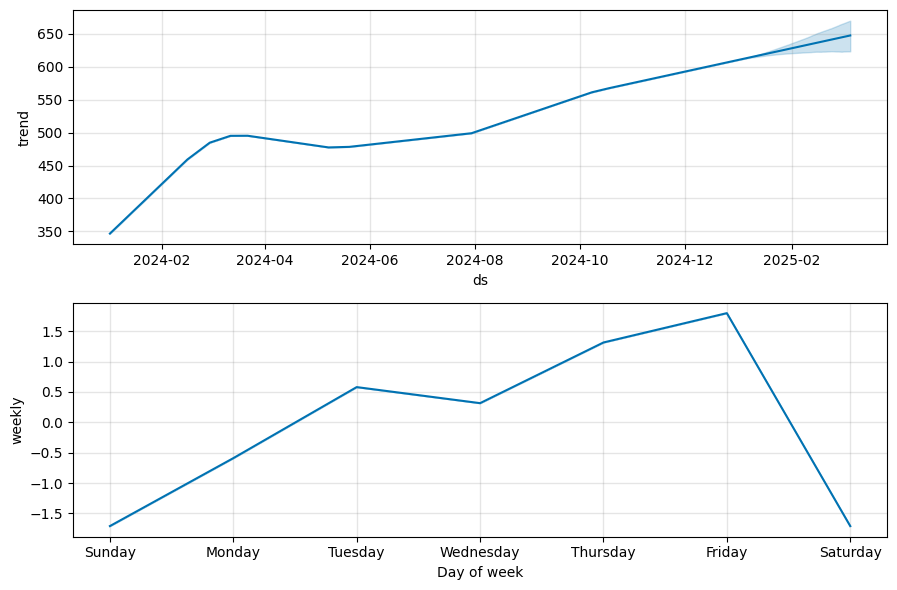

In [70]:
from prophet.plot import plot_components
fig_components = plot_components(m, forecast)
plt.show()

In [ ]:
# Python
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)